In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from env.EV_Sce_Env import EV_Sce_Env
import math
import seaborn as sns
import numpy as np

env_name = 'SY_2'
dir_GN = 'output/{}_T1_MAPPO'.format(env_name)
dir_2A = 'output/{}_T2_MAPPO'.format(env_name)
dir_GA = 'output/{}_T3_GA'.format(env_name)
data_dic = {
    'GN': dir_GN,
    '2A': dir_2A,
    'GA': dir_GA,
}
env = EV_Sce_Env(env_name, seed=0)

In [65]:
#哈佛大学Data Science课程CS109推荐的matplotlib 默认设置
#可以方便的设置一次，保证整体风格一致
from matplotlib import rcParams
# #图片大小
# rcParams['figure.figsize'] = (10, 6)
# #图片精度
# rcParams['figure.dpi'] = 150
# #线宽
# rcParams['lines.linewidth'] = 2
#是否显示网格
rcParams['axes.grid'] = True
#axes 填充颜色为浅灰
rcParams['axes.facecolor'] = '#eeeeee'
# #字体大小为14
# rcParams['font.size'] = 14
#边框为无色
rcParams['patch.edgecolor'] = 'none'

In [66]:
travel_time = pd.DataFrame(columns=['EV', 'Mel', 'Travel_time'])
j = 0
for m in data_dic.keys():
    df_evg = pd.read_csv(data_dic[m] +'/EV_g.csv')
    for i in range(df_evg.shape[0]):
        travel_time.loc[j] = [
            df_evg.iloc[i]['EV'], 
            m, 
            df_evg.iloc[i]['Reward']
        ]
        j += 1

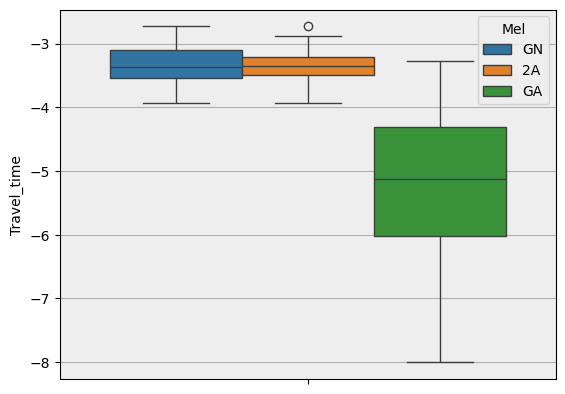

In [67]:
ax = sns.boxplot(y="Travel_time", hue='Mel', data=travel_time)

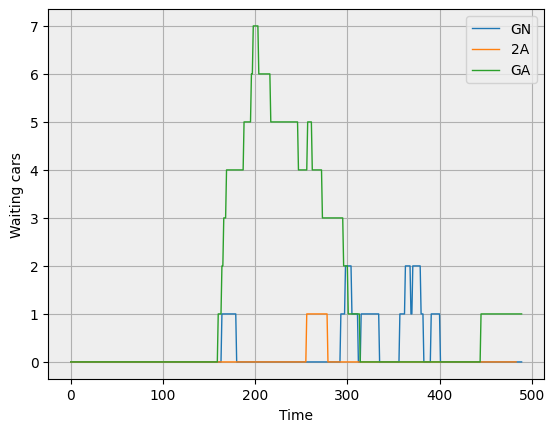

In [68]:
waiting_num = pd.DataFrame(columns=list(data_dic.keys()))
for m in data_dic.keys():
    df_cs = pd.read_csv(data_dic[m] + '/CS.csv')
    # total_time = list(df_cs['time'])

    columns = []
    for i in range(1, env.num_cs-1):
        columns.append('CS{}_waiting_num'.format(i))

    df_cs['total_waiting_num'] = df_cs[columns].sum(axis=1)
    waiting_num[m] = df_cs['total_waiting_num']

plt.plot(
    waiting_num, label=waiting_num.columns,
    linewidth=1
    )
plt.xlabel('Time')
plt.ylabel('Waiting cars')
plt.legend()

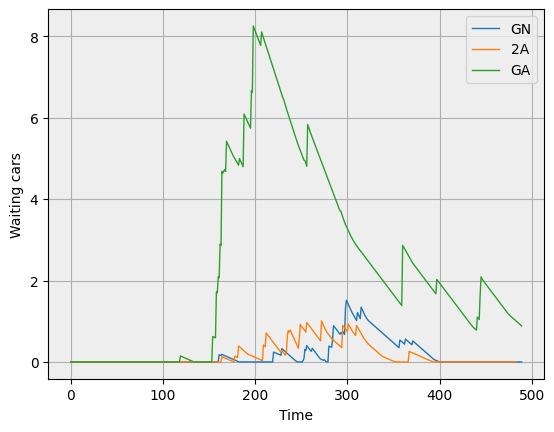

In [69]:
waiting_time = pd.DataFrame(columns=list(data_dic.keys()))
for m in data_dic.keys():
    df_cs = pd.read_csv(data_dic[m] + '/CS.csv')
    # total_time = list(df_cs['time'])

    columns = []
    for i in range(1, env.num_cs-1):
        columns.append('CS{}_waiting_time'.format(i))

    df_cs['total_waiting_time'] = df_cs[columns].sum(axis=1)
    waiting_time[m] = df_cs['total_waiting_time']

plt.plot(
    waiting_time, label=waiting_time.columns,
    linewidth=1
    )
plt.xlabel('Time')
plt.ylabel('Waiting cars')
plt.legend()

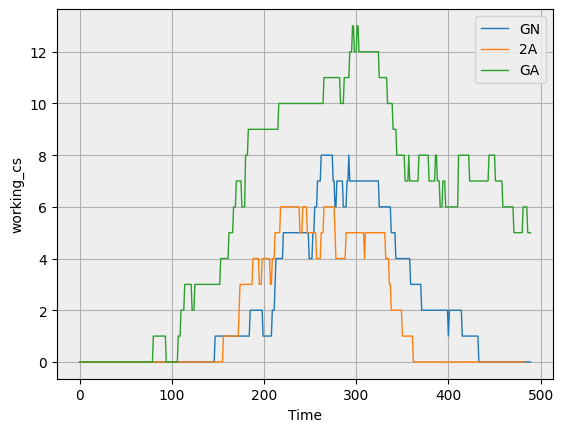

In [70]:
working_cs = pd.DataFrame(columns=list(data_dic.keys()))
for m in data_dic.keys():
    df_cs = pd.read_csv(data_dic[m] + '/CS.csv')
    # total_time = list(df_cs['time'])

    columns = []
    for i in range(1, env.num_cs-1):
        columns.append('CS{}_charging_num'.format(i))

    df_cs['working_cs'] = (df_cs[columns]>0).sum(axis=1)
    working_cs[m] = df_cs['working_cs']

plt.plot(
    working_cs, label=working_cs.columns,
    linewidth=1
    )
plt.xlabel('Time')
plt.ylabel('working_cs')
plt.legend()